In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [4]:
#split data into test and train
(x_train,y_train) , (x_test,y_test) = mnist.load_data()


In [6]:
x_train.shape

(60000, 28, 28)

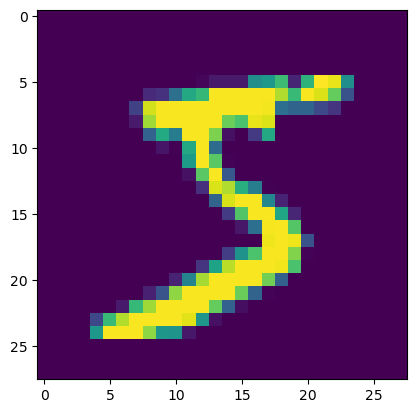

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

In [8]:
#checking value of each pixel before normalization

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
#Normalization- converting pixel values ranges 0-1

#x_train = x_train.astype("float32")
#x_test = x_test.astype("float32")
#x_train/=255
#x_test/=255

x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)


In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[0])

5


In [15]:
#Resizing image 

import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print(x_trainr.shape)
print(x_testr.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=x_trainr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])


In [43]:
print(len(x_trainr))

60000


In [44]:
model.fit(x_trainr, y_train, epochs = 6, validation_split = 0.3) # can add batch_size = 128 


Epoch 1/6
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0950 - accuracy: 0.9770 - val_loss: 0.0706 - val_accuracy: 0.9804
Epoch 2/6
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0775 - accuracy: 0.9795 - val_loss: 0.0656 - val_accuracy: 0.9828
Epoch 3/6
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0693 - accuracy: 0.9820 - val_loss: 0.0725 - val_accuracy: 0.9826
Epoch 4/6
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0633 - accuracy: 0.9845 - val_loss: 0.0729 - val_accuracy: 0.9804
Epoch 5/6
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0519 - accuracy: 0.9860 - val_loss: 0.0685 - val_accuracy: 0.9832
Epoch 6/6
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0480 - accuracy: 0.9876 - val_loss: 0.0681 - val_accuracy: 0.9838


In [45]:
test_loss, test_accuracy = model.evaluate(x_testr,y_test)

print("test_loss", test_loss)
print("test_accuracy",test_accuracy)


313/313 [==============================] - 3s 11ms/step - loss: 0.0655 - accuracy: 0.9855
test_loss 0.0655471533536911
test_accuracy 0.9854999780654907


In [46]:
predictions = model.predict(x_testr)

313/313 [==============================] - 3s 11ms/step


In [47]:
print(predictions)

[[2.16499019e-12 1.71428916e-08 5.73289753e-07 ... 9.99999166e-01
  2.78685491e-10 1.76348294e-07]
 [4.78059129e-12 5.76065140e-10 9.99998927e-01 ... 6.36432773e-08
  6.54647847e-09 3.49494288e-11]
 [3.70978382e-16 1.00000000e+00 2.22762780e-12 ... 3.80588052e-12
  1.65780931e-11 3.05809794e-13]
 ...
 [2.13826721e-20 6.01010195e-15 1.91912569e-17 ... 1.76718750e-15
  5.61764550e-14 1.47423185e-09]
 [3.41133131e-18 6.32667024e-19 4.50119719e-18 ... 2.51761840e-22
  1.05624285e-11 8.54596504e-13]
 [1.23048778e-06 1.77975874e-08 4.17417887e-08 ... 3.28298505e-13
  4.51884216e-06 6.94245372e-08]]


In [48]:
print(np.argmax(predictions[0]))

7


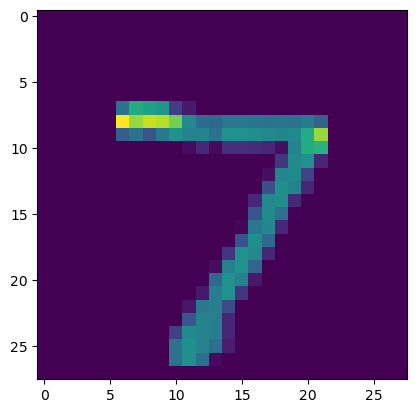

In [49]:
plt.imshow(x_testr[0])

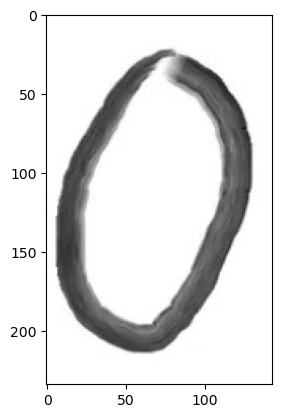

In [76]:
import cv2

image_path = "C:/Users/Vinod Kumar/Desktop/zero.jpg"
image = cv2.imread(image_path)

plt.imshow(image)

In [77]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [78]:
gray.shape

(234, 143)

In [79]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [80]:
resized.shape

(28, 28)

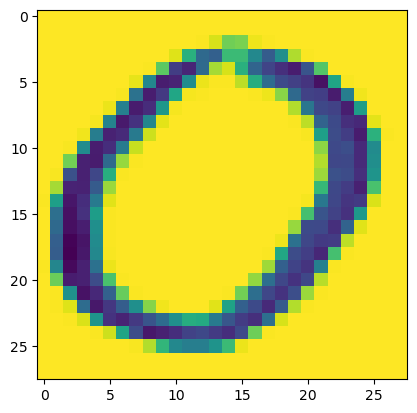

In [81]:
plt.imshow(resized)

In [82]:
print(resized[0])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255]


In [83]:
newimg = keras.utils.normalize(resized,axis=1)

In [84]:
print(newimg[0])

[0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
 0.18898224 0.18898224 0.18898224 0.18898224]


In [85]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) #for kernel operations


In [86]:
newimg.shape

(1, 28, 28, 1)

In [87]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 15ms/step


In [89]:
print(np.argmax(predictions))

0
